<a href="https://colab.research.google.com/github/jbtuku/Data-Engineering/blob/main/Data%20Synthsesis/datasynthesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install Faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import random
import re
from faker import Faker
from datetime import date, datetime

# Set seed for reproducibility
random.seed(42)
Faker.seed(42)

# Country distribution & locale map
countries = ['USA', 'India', 'China', 'Mexico', 'Canada', 'Philippines', 'Taiwan', 'South Korea']
weights = [0.60, 0.15, 0.08, 0.05, 0.04, 0.03, 0.025, 0.025]
locale_map = {
    'USA': 'en_US', 'India': 'en_IN', 'China': 'zh_CN', 'Mexico': 'es_MX',
    'Canada': 'en_CA', 'Philippines': 'en_PH', 'Taiwan': 'zh_TW', 'South Korea': 'ko_KR'
}

# Departments, roles, salary ranges
departments = ['Engineering', 'HR', 'Finance', 'Marketing', 'Sales', 'Operations', 'IT Support']
department_roles = {
    'Engineering': ['Software Engineer', 'Backend Engineer'],
    'HR': ['HR Manager', 'Recruiter'],
    'Finance': ['Financial Analyst', 'Accountant'],
    'Marketing': ['Marketing Lead', 'Content Strategist'],
    'Sales': ['Sales Representative', 'Account Executive'],
    'Operations': ['Operations Manager', 'Logistics Coordinator'],
    'IT Support': ['Systems Admin', 'Tech Support']
}
salary_ranges = {
    'Software Engineer': (90000, 140000), 'Backend Engineer': (85000, 130000),
    'HR Manager': (60000, 90000), 'Recruiter': (50000, 80000),
    'Financial Analyst': (70000, 100000), 'Accountant': (60000, 90000),
    'Marketing Lead': (65000, 100000), 'Content Strategist': (55000, 85000),
    'Sales Representative': (50000, 95000), 'Account Executive': (55000, 95000),
    'Operations Manager': (70000, 110000), 'Logistics Coordinator': (55000, 85000),
    'Systems Admin': (65000, 95000), 'Tech Support': (45000, 70000)
}

# Gender distribution
gender_choices = ['Female', 'Male', 'Nonbinary']
gender_weights = [0.49, 0.49, 0.02]

# Master faker for SSN and US phone
us_fake = Faker('en_US')

# Generate employee records
records = []

# Convert start date string to date object
start_hire_date = datetime.strptime('2010-01-01', '%Y-%m-%d').date()
end_hire_date = date.today()

for emp_id in range(1, 10001):
    country = random.choices(countries, weights=weights, k=1)[0]
    locale = locale_map.get(country, 'en_US')
    fake = Faker(locale)

    name = fake.name()
    gender = random.choices(gender_choices, weights=gender_weights, k=1)[0]
    birthdate = fake.date_of_birth(minimum_age=20, maximum_age=65)
    hiredate = fake.date_between(start_date=start_hire_date, end_date=end_hire_date)

    department = random.choice(departments)
    role = random.choice(department_roles[department])
    salary = random.randint(*salary_ranges[role])

    name_clean = re.sub(r'\W+', '', name.lower().replace(' ', '.'))
    email = f"{name_clean}.{emp_id}@example.com"

    phone = us_fake.phone_number()
    ssid = us_fake.ssn()

    records.append([
        f"{emp_id:09d}", country, name, phone, email, gender,
        birthdate, hiredate, department, role, salary, ssid
    ])

# Create DataFrame
columns = [
    'employeeID', 'CountryOfBirth', 'name', 'phone', 'email', 'gender',
    'birthdate', 'hiredate', 'department', 'role', 'salary', 'SSID'
]
emp_df = pd.DataFrame(records, columns=columns)

# Print output and validations
print(emp_df.head())
print("\n Unique emails:", emp_df['email'].nunique(), "out of", len(emp_df))
print(" Total yearly payroll: $", emp_df['salary'].sum())


  employeeID CountryOfBirth            name              phone  \
0  000000001          India   Aryan Maharaj       581-296-0013   
1  000000002            USA   Jerry Ramirez      (865)342-3511   
2  000000003            USA  Andrew Stevens       584-695-9310   
3  000000004          India   Arunima Setty  (653)541-9283x276   
4  000000005            USA  Andrew Stewart   001-553-676-7242   

                         email  gender   birthdate    hiredate  department  \
0   aryanmaharaj.1@example.com  Female  1970-09-10  2012-02-26     Finance   
1   jerryramirez.2@example.com  Female  1999-06-01  2021-09-15  Operations   
2  andrewstevens.3@example.com  Female  1965-03-03  2024-03-25          HR   
3   arunimasetty.4@example.com    Male  1988-09-01  2015-08-18  Operations   
4  andrewstewart.5@example.com  Female  1971-09-29  2013-04-03  IT Support   

                    role  salary         SSID  
0      Financial Analyst   77314  575-26-8929  
1     Operations Manager  108698  368-

In [3]:
emp_df.describe(include='all')

,employeeID,CountryOfBirth,name,phone,email,gender,birthdate,hiredate,department,role,salary,SSID
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000.000000,10000
unique,10000,8,9639,10000,10000,3,7500,4661,7,14,NaN,10000
top,000009984,USA,Michael Williams,573-493-4639,jeanettegraves.9984@example.com,Female,2003-11-27,2010-04-21,IT Support,Accountant,NaN,061-10-8563
freq,1,5966,5,1,1,4921,5,8,1461,763,NaN,1
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79963.887800,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18427.522446,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45081.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66941.750000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77496.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89746.000000,NaN


In [5]:
emp_df.head(10)

,employeeID,CountryOfBirth,name,phone,email,gender,birthdate,hiredate,department,role,salary,SSID
0,000000001,India,Aryan Maharaj,581-296-0013,aryanmaharaj.1@example.com,Female,1970-09-10,2012-02-26,Finance,Financial Analyst,77314,575-26-8929
1,000000002,USA,Jerry Ramirez,(865)342-3511,jerryramirez.2@example.com,Female,1999-06-01,2021-09-15,Operations,Operations Manager,108698,368-45-9892
2,000000003,USA,Andrew Stevens,584-695-9310,andrewstevens.3@example.com,Female,1965-03-03,2024-03-25,HR,HR Manager,76559,082-30-1655
3,000000004,India,Arunima Setty,(653)541-9283x276,arunimasetty.4@example.com,Male,1988-09-01,2015-08-18,Operations,Logistics Coordinator,62223,702-42-0917
4,000000005,USA,Andrew Stewart,001-553-676-7242,andrewstewart.5@example.com,Female,1971-09-29,2013-04-03,IT Support,Systems Admin,89864,765-75-7020
5,000000006,China,黄成,9126269166,黄成.6@example.com,Male,1982-11-13,2011-05-28,Finance,Accountant,65094,567-02-1877
6,000000007,USA,Kimberly Adams,(727)404-8281x48932,kimberlyadams.7@example.com,Male,1988-11-29,2011-09-21,Engineering,Software Engineer,114898,553-68-0010
7,000000008,USA,Katherine Rodriguez,430-639-1171x8227,katherinerodriguez.8@example.com,Male,1976-02-15,2025-03-15,Sales,Account Executive,57847,541-78-6933
8,000000009,India,Sai Muni,(578)571-3315x098,saimuni.9@example.com,Male,1977-10-12,2020-05-12,Marketing,Marketing Lead,84213,008-10-0965
9,000000010,China,王超,547.938.2997,王超.10@example.com,Male,1998-12-21,2011-02-04,IT Support,Tech Support,63918,827-53-3120


In [4]:
!pip install pandas openpyxl faker matplotlib seaborn --quiet

### A. Country of Birth Counts

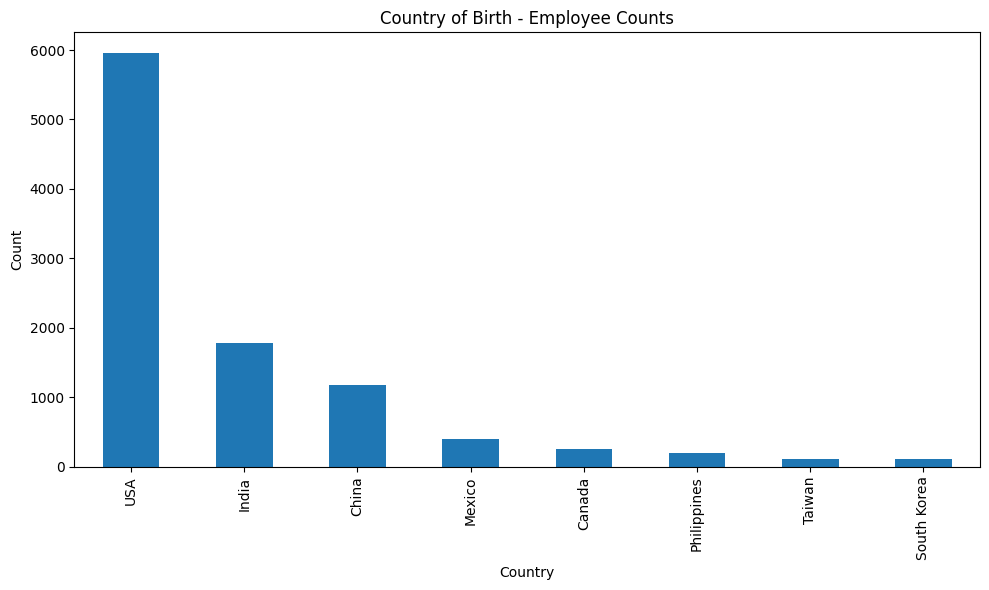

### B. Department Employee Counts

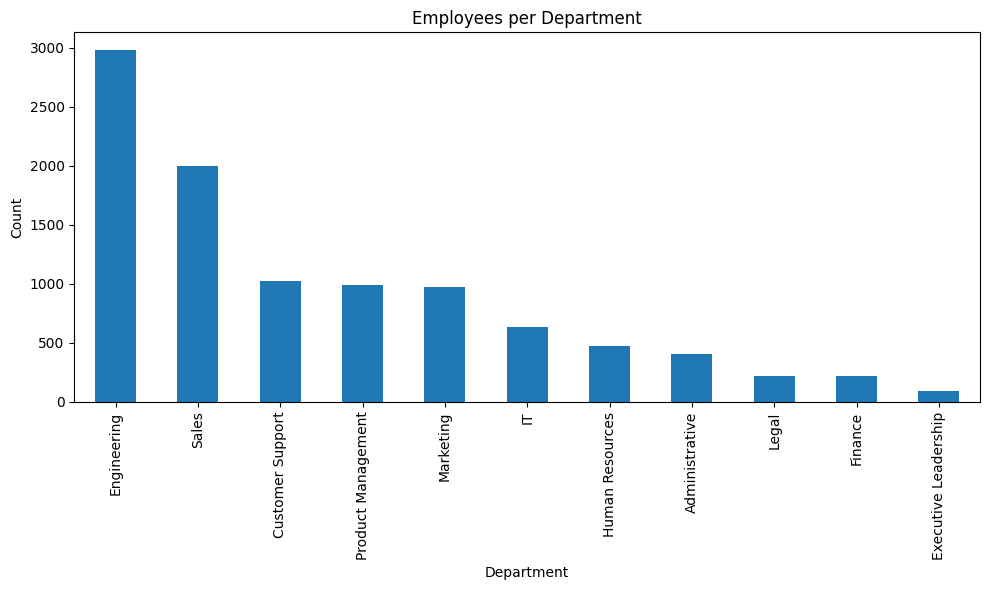

### C. Hires by Day of the Week

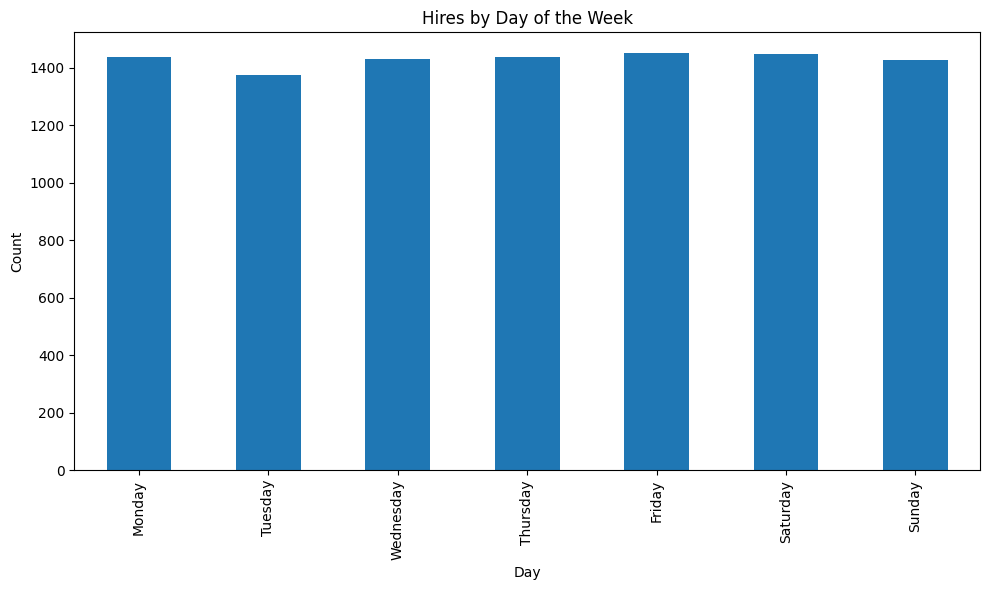

### D. KDE Plot of Salaries

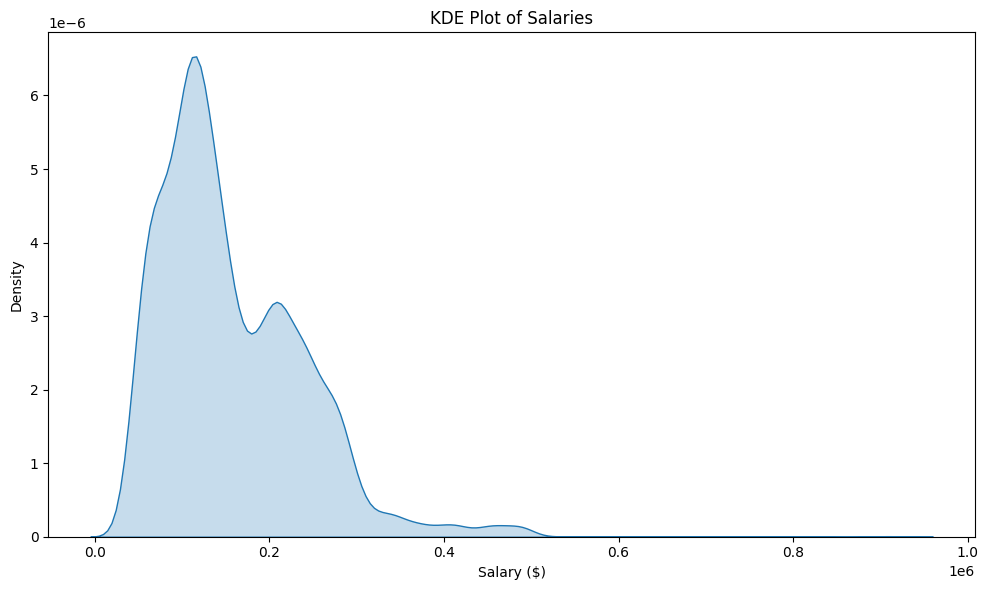

### E. Employees by Birth Year

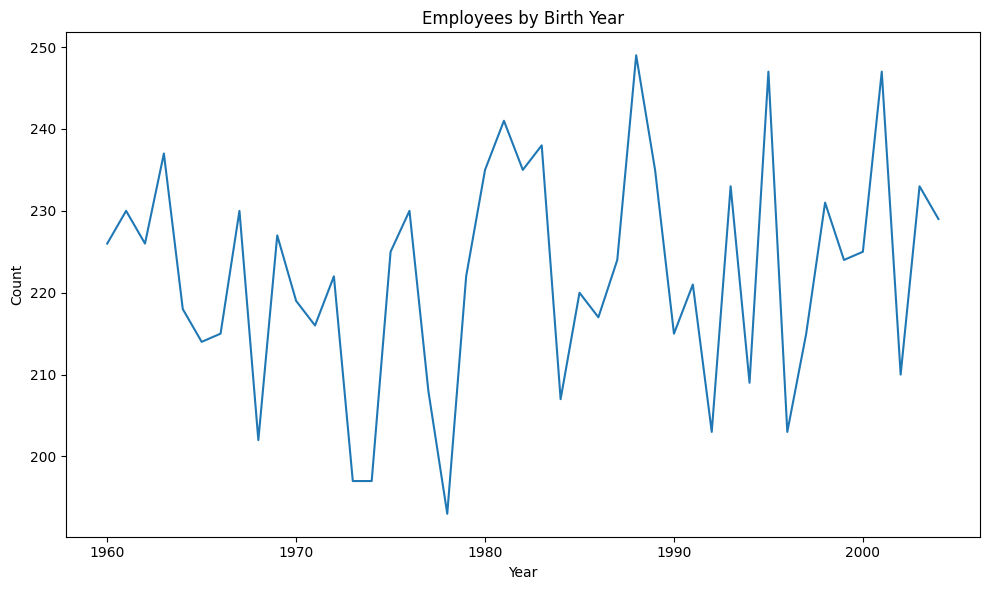

### F. Salary Distribution by Department (KDE)

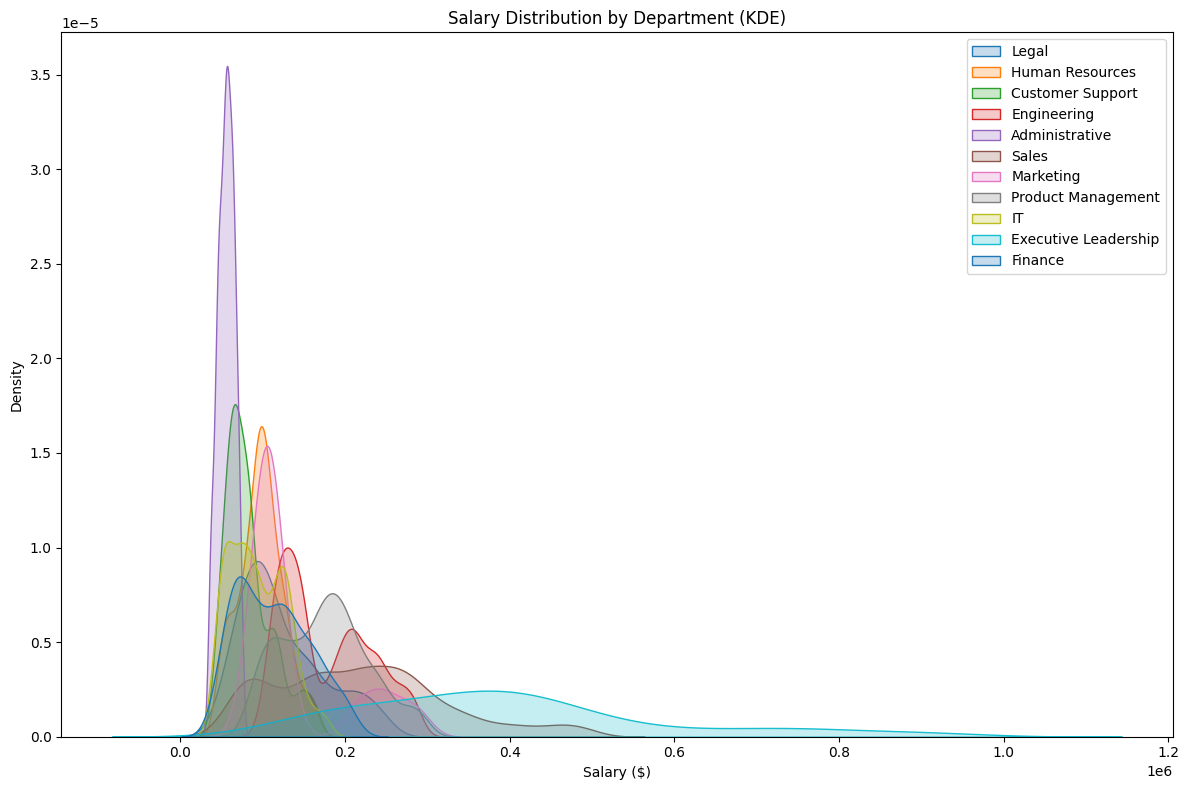

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
from datetime import datetime
import numpy as np
import random

# Ensure hiredate column exists
if 'hiredate' not in emp_df.columns:
    if 'birthdate' not in emp_df.columns:
        birth_years = np.random.randint(datetime.now().year - 65, datetime.now().year - 20, size=len(emp_df))
        emp_df['birthdate'] = [datetime(year, random.randint(1, 12), random.randint(1, 28)) for year in birth_years]

    hiredates = []
    for bd in emp_df['birthdate']:
        min_hire_year = max(bd.year + 20, 2010)
        year = random.randint(min_hire_year, datetime.now().year)
        hiredates.append(datetime(year, random.randint(1, 12), random.randint(1, 28)))
    emp_df['hiredate'] = hiredates

# A. Country of Birth Bar Chart
display(Markdown("### A. Country of Birth Counts"))
plt.figure(figsize=(10,6))
emp_df['CountryOfBirth'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title("Country of Birth - Employee Counts")
plt.xlabel("Country")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("plot_A_country.png")
plt.show()

# B. Department Bar Chart
display(Markdown("### B. Department Employee Counts"))
plt.figure(figsize=(10,6))
emp_df['department'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title("Employees per Department")
plt.xlabel("Department")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("plot_B_department.png")
plt.show()

# C. Hire Day of the Week
display(Markdown("### C. Hires by Day of the Week"))
emp_df['hire_day'] = emp_df['hiredate'].dt.day_name()
plt.figure(figsize=(10,6))
emp_df['hire_day'].value_counts().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
).plot(kind='bar')
plt.title("Hires by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("plot_C_hireday.png")
plt.show()

# D. KDE plot of salaries
display(Markdown("### D. KDE Plot of Salaries"))
plt.figure(figsize=(10,6))
sns.kdeplot(emp_df['salary'], fill=True)
plt.title("KDE Plot of Salaries")
plt.xlabel("Salary ($)")
plt.tight_layout()
plt.savefig("plot_D_kde_salary.png")
plt.show()

# E. Birth Year Line Plot
display(Markdown("### E. Employees by Birth Year"))
emp_df['birth_year'] = emp_df['birthdate'].dt.year
plt.figure(figsize=(10,6))
emp_df['birth_year'].value_counts().sort_index().plot(kind='line')
plt.title("Employees by Birth Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("plot_E_birth_year.png")
plt.show()

# F. KDE plots of salary by department
display(Markdown("### F. Salary Distribution by Department (KDE)"))
plt.figure(figsize=(12,8))
for dept in emp_df['department'].unique():
    sns.kdeplot(emp_df[emp_df['department'] == dept]['salary'], label=dept, fill=True)
plt.title("Salary Distribution by Department (KDE)")
plt.xlabel("Salary ($)")
plt.legend()
plt.tight_layout()
plt.savefig("plot_F_kde_dept.png")
plt.show()

In [ ]:
from datetime import datetime


if 'age' not in emp_df.columns:
    emp_df['age'] = emp_df['birthdate'].apply(lambda x: datetime.now().year - x.year)


weights = emp_df['age'].apply(lambda a: 3 if 40 <= a <= 49 else 1)


smpl_df = emp_df.sample(n=500, weights=weights, random_state=42)

print("smpl_df.head(10):")
display(smpl_df.head(10))

print("\nsmpl_df.describe(include='all'):")
display(smpl_df.describe(include='all'))


smpl_df.head(10):


,employeeID,CountryOfBirth,name,phone,email,department,role,salary,birthdate,hiredate,hire_day,birth_year,age
3786,100003786,USA,Dana Hanson DDS,743-583-9750,timothyoliver@example.net,Engineering,Senior Software Engineer,185179,1983-12-16,2012-08-24,Friday,1983,42
9497,100009497,USA,Melissa Brandt,001-434-213-2613x84558,jacksonamy@example.com,Marketing,VP of Marketing,234301,1983-04-06,2024-10-27,Sunday,1983,42
7343,100007343,USA,James Olson,624-417-0013x732,banksclifford@example.net,Marketing,Senior Marketing Manager,110146,1984-10-27,2012-12-14,Friday,1984,41
6013,100006013,China,谢秀云,001-433-531-7361,pingzhao@example.org,Administrative,General Administrative Assistant,47001,2004-04-22,2025-08-25,Monday,2004,21
1595,100001595,USA,John Moore,(228)737-7427,dwilliams@example.net,Sales,Account Executive,111773,1999-11-19,2024-07-15,Monday,1999,26
575,100000575,China,李凤英,607.705.7836x091,jing77@example.org,Engineering,Lead Software Engineer,217458,1965-04-19,2012-09-19,Wednesday,1965,60
8665,100008665,India,Lopa Nagar,+1-380-558-2888x9041,nicholasacharya@example.com,Product Management,VP of Product,263329,1995-02-16,2018-08-01,Wednesday,1995,30
6032,100006032,India,Vasatika Tailor,327.410.6795x1787,karanekapad@example.org,Engineering,Backend Engineer,149739,1981-12-08,2019-08-18,Sunday,1981,44
7108,100007108,China,汪玲,+1-545-399-3423x459,flin@example.net,Customer Support,Director of Customer Support,132685,1982-02-02,2023-11-02,Thursday,1982,43
203,100000203,USA,Kelly Johnson,001-524-842-0438x05719,brianbrown@example.com,IT,IT Manager,95182,1976-01-03,2022-05-21,Saturday,1976,49



smpl_df.describe(include='all'):


,employeeID,CountryOfBirth,name,phone,email,department,role,salary,birthdate,hiredate,hire_day,birth_year,age
count,5.000000e+02,500,500,500,500,500,500,500.000000,500,500,500,500.00000,500.00000
unique,NaN,8,498,500,500,11,67,NaN,NaN,NaN,7,NaN,NaN
top,NaN,USA,James Olson,+1-927-877-3177x859,rpayne@example.com,Engineering,Principal Software Engineer,NaN,NaN,NaN,Wednesday,NaN,NaN
freq,NaN,297,2,1,1,132,28,NaN,NaN,NaN,83,NaN,NaN
mean,1.000050e+08,NaN,NaN,NaN,NaN,NaN,NaN,153668.642000,1983-07-16 08:15:21.600000,2018-11-14 22:47:59.999999744,NaN,1983.05400,41.94600
min,1.000000e+08,NaN,NaN,NaN,NaN,NaN,NaN,37668.000000,1960-02-05 00:00:00,2010-01-08 00:00:00,NaN,1960.00000,21.00000
25%,1.000025e+08,NaN,NaN,NaN,NaN,NaN,NaN,90639.250000,1976-10-10 00:00:00,2015-04-28 18:00:00,NaN,1976.00000,33.00000
50%,1.000052e+08,NaN,NaN,NaN,NaN,NaN,NaN,132347.000000,1982-08-04 00:00:00,2018-12-20 00:00:00,NaN,1982.00000,43.00000
75%,1.000076e+08,NaN,NaN,NaN,NaN,NaN,NaN,210107.500000,1992-06-29 06:00:00,2022-11-08 06:00:00,NaN,1992.00000,49.00000
max,1.000099e+08,NaN,NaN,NaN,NaN,NaN,NaN,659229.000000,2004-12-24 00:00:00,2025-12-25 00:00:00,NaN,2004.00000,65.00000


In [ ]:
import numpy as np
from IPython.display import display

std_dev = emp_df['salary'].mean() * 0.1


noise = np.random.normal(loc=0, scale=std_dev, size=len(emp_df))


perturbed_salaries = emp_df['salary'] + noise
perturbed_salaries = np.clip(perturbed_salaries, a_min=0, a_max=None)


prtrb_df = emp_df.copy()
prtrb_df['salary'] = perturbed_salaries.round(2)

print("prtrb_df.head(10):")
display(prtrb_df.head(10))

print("\nprtrb_df.describe(include='all'):")
display(prtrb_df.describe(include='all'))

prtrb_df.head(10):


,employeeID,CountryOfBirth,name,phone,email,department,role,salary,birthdate,hiredate,hire_day,birth_year,age
0,100000000,India,Aryan Maharaj,581-296-0013,udantdewan@example.net,Legal,Legal Operations,151345.02,1990-02-13,2016-04-28,Thursday,1990,35
1,100000001,USA,Michelle Miles,3268542351,lrobinson@example.com,Human Resources,Senior Recruiter,103436.18,1966-08-23,2011-10-15,Saturday,1966,59
2,100000002,USA,Ryan Munoz,584-695-9310,blairamanda@example.com,Customer Support,Customer Support Representative,39855.47,1981-09-16,2010-02-20,Saturday,1981,44
3,100000003,USA,Dr. Sharon James,(653)541-9283x276,xreid@example.org,Customer Support,Customer Support Representative,36054.76,1964-02-19,2015-05-15,Friday,1964,61
4,100000004,India,Daksh Karnik,639-453-7672,muttinandini@example.com,Engineering,Full-Stack Engineer,138549.69,1996-03-27,2023-01-21,Saturday,1996,29
5,100000005,India,Adya Sangha,671.201.2269x16697,opathak@example.org,Administrative,IT Services Administrative Assistant,46579.81,1960-07-04,2024-06-04,Tuesday,1960,65
6,100000006,Mexico,Omar Jaramillo Molina,704.482.8148x932,lozadamanuel@example.org,Legal,Legal Operations,116145.33,1965-06-10,2022-03-04,Friday,1965,60
7,100000007,USA,Paula Moreno,(443)903-9117x182,georgetracy@example.org,Sales,Sales Development Rep,67550.16,2004-09-16,2024-10-17,Thursday,2004,21
8,100000008,USA,Carmen Rose,001-734-265-7871x331,ibrandt@example.net,Marketing,Marketing Manager,80300.07,1963-11-05,2023-04-13,Thursday,1963,62
9,100000009,USA,Crystal Robinson,4519834738,zimmermanbrian@example.org,Engineering,Frontend Engineer,81111.04,1989-01-28,2024-09-22,Sunday,1989,36



prtrb_df.describe(include='all'):


,employeeID,CountryOfBirth,name,phone,email,department,role,salary,birthdate,hiredate,hire_day,birth_year,age
count,1.000000e+04,10000,10000,10000,10000,10000,10000,10000.000000,10000,10000,10000,10000.000000,10000.000000
unique,NaN,8,9592,10000,9871,11,75,NaN,NaN,NaN,7,NaN,NaN
top,NaN,USA,James Jones,(818)826-0176x2222,jamessmith@example.com,Engineering,Backend Engineer,NaN,NaN,NaN,Friday,NaN,NaN
freq,NaN,5957,4,1,3,2980,531,NaN,NaN,NaN,1450,NaN,NaN
mean,1.000050e+08,NaN,NaN,NaN,NaN,NaN,NaN,157036.349954,1982-08-11 16:47:42.720000,2019-03-02 00:14:58.559999744,NaN,1982.113200,42.886800
min,1.000000e+08,NaN,NaN,NaN,NaN,NaN,NaN,4424.180000,1960-01-01 00:00:00,2010-01-01 00:00:00,NaN,1960.000000,21.000000
25%,1.000025e+08,NaN,NaN,NaN,NaN,NaN,NaN,95500.960000,1971-04-10 12:00:00,2015-05-11 00:00:00,NaN,1971.000000,32.000000
50%,1.000050e+08,NaN,NaN,NaN,NaN,NaN,NaN,136389.390000,1982-09-23 00:00:00,2019-10-09 00:00:00,NaN,1982.000000,43.000000
75%,1.000075e+08,NaN,NaN,NaN,NaN,NaN,NaN,210113.615000,1993-11-22 12:00:00,2023-04-12 06:00:00,NaN,1993.000000,54.000000
max,1.000100e+08,NaN,NaN,NaN,NaN,NaN,NaN,901637.930000,2004-12-28 00:00:00,2025-12-28 00:00:00,NaN,2004.000000,65.000000


In [ ]:
!pip install ydata-profiling --quiet

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.6 MB/s eta 0:00:00
